# Life Expectancy Predictor

WHO data can be found at: https://www.kaggle.com/kumarajarshi/life-expectancy-who/data 
        
        

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

## 2. Load data

In [2]:
df = pd.read_csv('./Life Expectancy Data.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.shape

(2938, 22)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


## 3. Clean data

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
# rename column names with trailing spaces
df.rename(columns={"Life expectancy ":"life_expectancy", 
                   "Adult Mortality":"adult_mortality",
                   "infant deaths":"infact_deaths",
                   "percentage expenditure":"percentage_expenditure",
                   "Hepatitis B":"Hepatitis_B",
                   "Measles ":"measles",
                   " BMI ":"BMI",
                   "under-five deaths ": "under_five_deaths",
                   "Total expenditure":"total_expenditure",
                   "Diphtheria ":"diphtheria",
                   " HIV/AIDS":"HIV_AIDS",
                   " thinness  1-19 years":"thinness_1-19_years",
                   " thinness 5-9 years":"thinness_5-9_years",
                   "Income composition of resources":"income_composition_of_resources"
                   }, inplace=True)
df.head()

,Country,Year,Status,life_expectancy,adult_mortality,infact_deaths,Alcohol,percentage_expenditure,Hepatitis_B,measles,...,Polio,total_expenditure,diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infact_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [9]:
# what percentage of data is missing
df.isnull().sum() / len(df) * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
life_expectancy                     0.340368
adult_mortality                     0.340368
infact_deaths                       0.000000
Alcohol                             6.603131
percentage_expenditure              0.000000
Hepatitis_B                        18.822328
measles                             0.000000
BMI                                 1.157250
under_five_deaths                   0.000000
Polio                               0.646698
total_expenditure                   7.692308
diphtheria                          0.646698
HIV_AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness_1-19_years                 1.157250
thinness_5-9_years                  1.157250
income_composition_of_resources     5.684139
Schooling                           5.547992
dtype: flo

In [10]:
# create a countries list
country_list = df.Country.unique()

# create a list of incomplete columns
fill_cols = ['life_expectancy', 'adult_mortality', 'Alcohol', 'Hepatitis_B', 'BMI', 'Polio', 'total_expenditure',
            'diphtheria', 'GDP', 'Population', 'thinness_1-19_years', 'thinness_5-9_years', 'income_composition_of_resources',
            'Schooling']

In [11]:
# use interpolation for null values
for country in country_list:
    df.loc[df['Country'] == country,fill_cols] = df.loc[df['Country'] == country,fill_cols].interpolate()
    
# drop remaining rows
df.dropna(inplace=True)

In [12]:
df.isnull().sum() / len(df) * 100

Country                            0.0
Year                               0.0
Status                             0.0
life_expectancy                    0.0
adult_mortality                    0.0
infact_deaths                      0.0
Alcohol                            0.0
percentage_expenditure             0.0
Hepatitis_B                        0.0
measles                            0.0
BMI                                0.0
under_five_deaths                  0.0
Polio                              0.0
total_expenditure                  0.0
diphtheria                         0.0
HIV_AIDS                           0.0
GDP                                0.0
Population                         0.0
thinness_1-19_years                0.0
thinness_5-9_years                 0.0
income_composition_of_resources    0.0
Schooling                          0.0
dtype: float64

## 4. Exploratory Data Analysis
Let's find correlations within the data to train the model.

<AxesSubplot:title={'center':'Life Expectancy Distribution'}, xlabel='life_expectancy', ylabel='Density'>

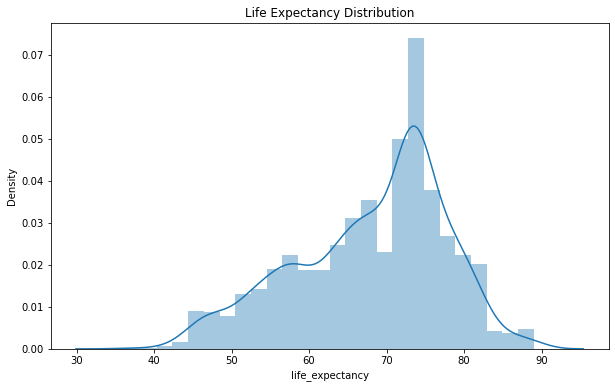

In [15]:
plt.figure(figsize=(10,6))
plt.title("Life Expectancy Distribution")
sns.distplot(df.life_expectancy)

In [16]:
df[['Status','life_expectancy']].groupby(['Status']).mean()

,life_expectancy
Status,
Developed,78.831579
Developing,66.164982


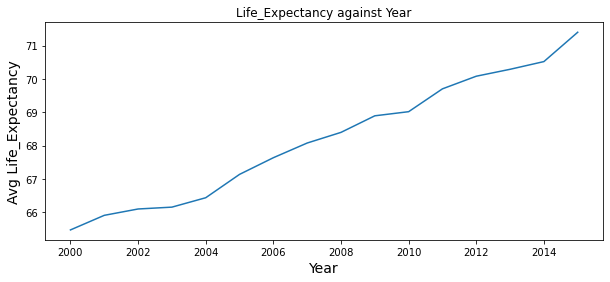

In [24]:
# life expectancy by year

plt.figure(figsize=(10,4))

plt.plot(df.groupby('Year')['Year'].count().index, df.groupby('Year')['life_expectancy'].mean())
plt.xlabel("Year",fontsize=14)
plt.ylabel("Avg Life_Expectancy",fontsize=14)
plt.title("Life_Expectancy against Year")
plt.show()

Text(0, 0.5, 'Life Expectancy')

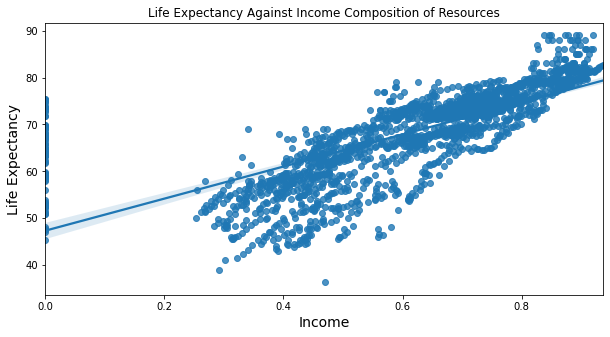

In [53]:
plt.figure(figsize=(10,5))

sns.regplot(df["income_composition_of_resources"], df["life_expectancy"])

plt.title("Life Expectancy Against Income Composition of Resources")
plt.xlabel("Income",fontsize=14)
plt.ylabel("Life Expectancy",fontsize=14)

Text(0, 0.5, 'Life Expectancy')

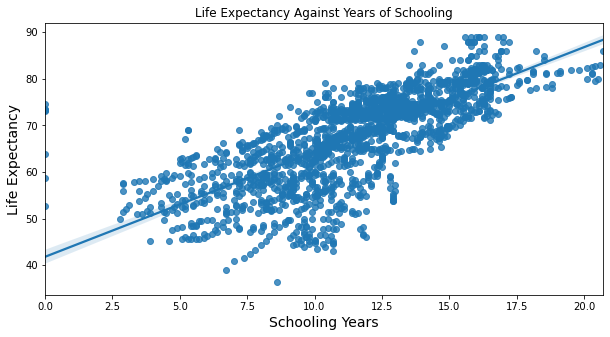

In [52]:
plt.figure(figsize=(10,5))

sns.regplot(df["Schooling"], df["life_expectancy"])

plt.title("Life Expectancy Against Years of Schooling")
plt.xlabel("Schooling Years",fontsize=14)
plt.ylabel("Life Expectancy",fontsize=14)

Text(0, 0.5, 'Income')

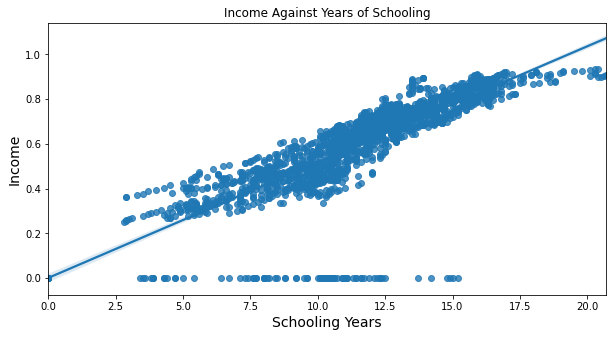

In [51]:
plt.figure(figsize=(10,5))

sns.regplot(df["Schooling"], df["income_composition_of_resources"])

plt.title("Income Against Years of Schooling")
plt.xlabel("Schooling Years",fontsize=14)
plt.ylabel("Income",fontsize=14)

Text(0, 0.5, 'Life Expectancy')

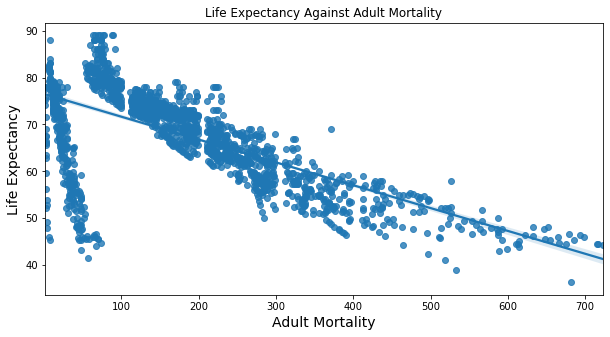

In [49]:
plt.figure(figsize=(10,5))

sns.regplot(df["adult_mortality"], df["life_expectancy"])

plt.title("Life Expectancy Against Adult Mortality")
plt.xlabel("Adult Mortality",fontsize=14)
plt.ylabel("Life Expectancy",fontsize=14)

Text(0, 0.5, 'Life Expectancy')

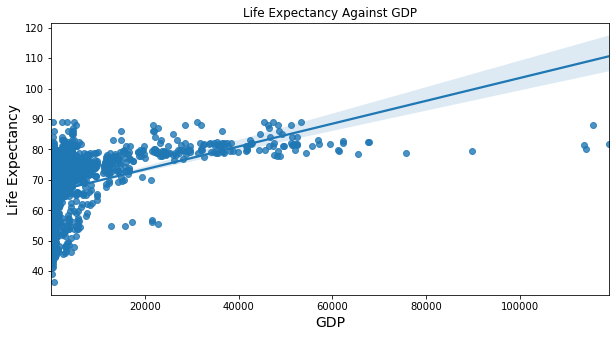

In [54]:
plt.figure(figsize=(10,5))

sns.regplot(x="GDP", y="life_expectancy", data=df)

plt.title("Life Expectancy Against GDP")
plt.xlabel("GDP",fontsize=14)
plt.ylabel("Life Expectancy",fontsize=14)

Text(0, 0.5, 'Life Expectancy')

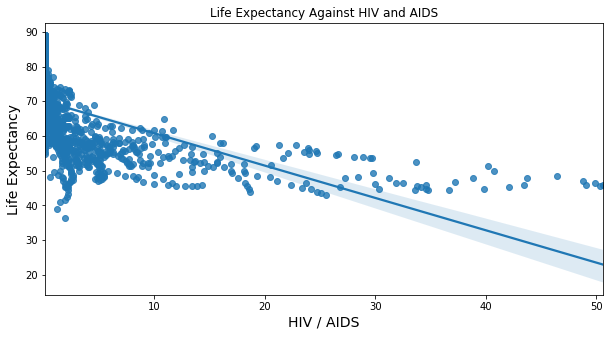

In [57]:
plt.figure(figsize=(10,5))

sns.regplot(x="HIV_AIDS", y="life_expectancy", data=df)

plt.title("Life Expectancy Against HIV and AIDS")
plt.xlabel("HIV / AIDS",fontsize=14)
plt.ylabel("Life Expectancy",fontsize=14)

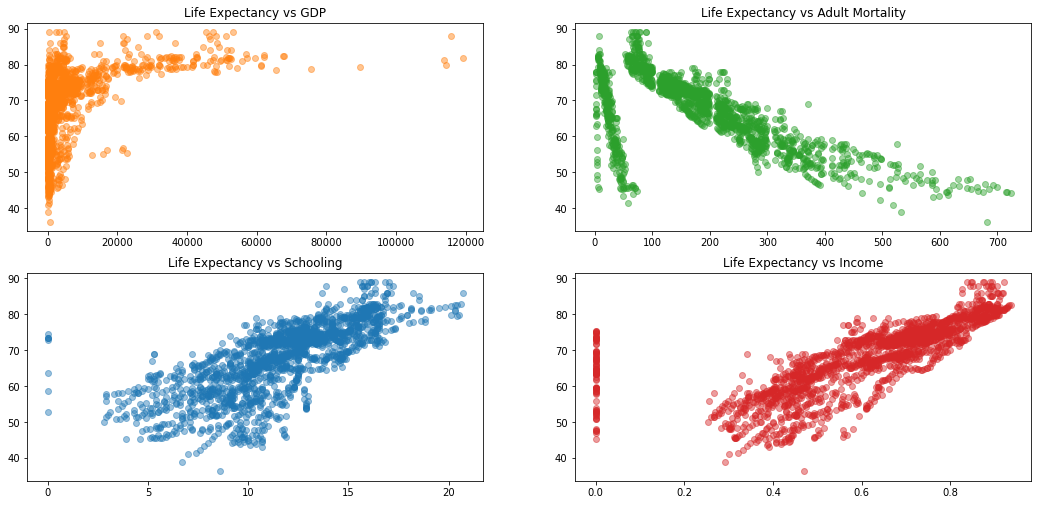

In [59]:
plt.figure(figsize=(18, 36))

plt.subplot(8,2,1)
plt.title("Life Expectancy vs GDP")
plt.scatter(df["GDP"], df["life_expectancy"],color='C1',alpha=0.45)

plt.subplot(8,2,2)
plt.title("Life Expectancy vs Adult Mortality")
plt.scatter(df["adult_mortality"], df["life_expectancy"],color='C2',alpha=0.45)

plt.subplot(8,2,3)
plt.title("Life Expectancy vs Schooling")
plt.scatter(df["Schooling"], df["life_expectancy"],alpha=0.45)

plt.subplot(8,2,4)
plt.title("Life Expectancy vs Income")
plt.scatter(df["income_composition_of_resources"], df["life_expectancy"],color='C3',alpha=0.45)

## 5. Data Loaders
Label the selected features for ML model:

In [61]:
df.columns

Index(['Country', 'Year', 'Status', 'life_expectancy', 'adult_mortality',
       'infact_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'measles', 'BMI', 'under_five_deaths', 'Polio', 'total_expenditure',
       'diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'Schooling'],
      dtype='object')

In [76]:
num_rows = df.index.size
input_size = 6
output_size = 1


categorical_cols = ['Status']
target_col = ['life_expectancy']
input_cols = ['Status', 'GDP', 'HIV_AIDS', 'adult_mortality', 'Schooling', 'income_composition_of_resources']
df[input_cols].head()

,Status,GDP,HIV_AIDS,adult_mortality,Schooling,income_composition_of_resources
0,Developing,584.259210,0.1,263.0,10.1,0.479
1,Developing,612.696514,0.1,271.0,10.0,0.476
2,Developing,631.744976,0.1,268.0,9.9,0.470
3,Developing,669.959000,0.1,272.0,9.8,0.463
4,Developing,63.537231,0.1,275.0,9.5,0.454


In [77]:
# convert dataframes to numpy arrays
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[target_col].to_numpy()
    return inputs_array, targets_array

In [78]:
inputs, targets = dataframe_to_arrays(df)
inputs, targets

(array([[1.00000000e+00, 5.84259210e+02, 1.00000000e-01, 2.63000000e+02,
         1.01000000e+01, 4.79000000e-01],
        [1.00000000e+00, 6.12696514e+02, 1.00000000e-01, 2.71000000e+02,
         1.00000000e+01, 4.76000000e-01],
        [1.00000000e+00, 6.31744976e+02, 1.00000000e-01, 2.68000000e+02,
         9.90000000e+00, 4.70000000e-01],
        ...,
        [1.00000000e+00, 5.73483400e+01, 3.98000000e+01, 7.30000000e+01,
         1.00000000e+01, 4.27000000e-01],
        [1.00000000e+00, 5.48587312e+02, 4.21000000e+01, 6.86000000e+02,
         9.80000000e+00, 4.27000000e-01],
        [1.00000000e+00, 5.47358879e+02, 4.35000000e+01, 6.65000000e+02,
         9.80000000e+00, 4.34000000e-01]]),
 array([[65. ],
        [59.9],
        [59.9],
        ...,
        [44.8],
        [45.3],
        [46. ]]))

In [79]:
inputs.shape, targets.shape

((1987, 6), (1987, 1))

In [80]:
# convert to PyTorch dataset
dataset = TensorDataset(torch.tensor(inputs, dtype=torch.float32),
                        torch.tensor(targets, dtype=torch.float32))

val_percent = 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])

batch_size = 2 ** 8

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size * 2)

## 6. Build Model

In [81]:
class LifeExpectancyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, xb):
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.smooth_l1_loss(out, targets)    # Calculate loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.smooth_l1_loss(out, targets)    # Calculate loss
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

## 7. Train Model

In [82]:
for xb, yb in train_loader:
    print("Inputs:", xb)
    print("Targets:", yb)
    break

Inputs: tensor([[1.0000e+00, 1.4522e+02, 1.0000e-01, 1.5400e+02, 1.1000e+01, 6.6800e-01],
        [1.0000e+00, 2.5296e+03, 5.0300e+01, 6.9000e+01, 9.4000e+00, 4.9200e-01],
        [1.0000e+00, 1.6163e+02, 3.7000e+00, 3.4300e+02, 5.8000e+00, 3.2500e-01],
        ...,
        [1.0000e+00, 2.7613e+02, 1.0000e-01, 2.2100e+02, 1.3100e+01, 6.8100e-01],
        [0.0000e+00, 3.5579e+04, 1.0000e-01, 7.0000e+00, 1.6100e+01, 8.5400e-01],
        [1.0000e+00, 1.5265e+03, 1.0000e-01, 1.5400e+02, 1.1400e+01, 6.1400e-01]])
Targets: tensor([[68.4000],
        [45.6000],
        [56.0000],
        [58.9000],
        [66.0000],
        [67.2000],
        [73.0000],
        [68.7000],
        [79.3000],
        [75.3000],
        [73.4000],
        [68.1000],
        [54.3000],
        [71.6000],
        [71.6000],
        [61.1000],
        [73.9000],
        [67.4000],
        [58.0000],
        [75.4000],
        [79.8000],
        [76.2000],
        [48.1000],
        [65.2000],
        [47.6000],
  

In [83]:
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [84]:
model = LifeExpectancyModel()

In [86]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1667,  0.2134, -0.3931,  0.3788,  0.3991,  0.3640]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.1527], requires_grad=True)]

In [87]:
result = evaluate(model, val_loader)
result

{'val_loss': 1225.1376953125}

With the model intialised, we can start training it:

In [88]:
epochs = 1000
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [89]:
history = fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                       grad_clip=grad_clip,
                       weight_decay=weight_decay,
                       opt_func=opt_func)

Epoch [1], val_loss: 1208.6110
Epoch [2], val_loss: 1192.0654
Epoch [3], val_loss: 1175.4801
Epoch [4], val_loss: 1158.8336
Epoch [5], val_loss: 1142.1050
Epoch [6], val_loss: 1125.2721
Epoch [7], val_loss: 1108.3143
Epoch [8], val_loss: 1091.2084
Epoch [9], val_loss: 1073.9359
Epoch [10], val_loss: 1056.4783
Epoch [11], val_loss: 1038.8102
Epoch [12], val_loss: 1020.9090
Epoch [13], val_loss: 1002.7521
Epoch [14], val_loss: 984.3179
Epoch [15], val_loss: 965.5869
Epoch [16], val_loss: 946.5384
Epoch [17], val_loss: 927.1486
Epoch [18], val_loss: 907.3957
Epoch [19], val_loss: 887.2649
Epoch [20], val_loss: 866.7316
Epoch [21], val_loss: 845.7731
Epoch [22], val_loss: 824.3668
Epoch [23], val_loss: 802.4935
Epoch [24], val_loss: 780.1350
Epoch [25], val_loss: 757.2747
Epoch [26], val_loss: 733.8945
Epoch [27], val_loss: 709.9833
Epoch [28], val_loss: 685.5049
Epoch [29], val_loss: 660.4329
Epoch [30], val_loss: 634.7519
Epoch [31], val_loss: 608.4449
Epoch [32], val_loss: 581.5333
Epoc

Epoch [277], val_loss: 11.8566
Epoch [278], val_loss: 7.6997
Epoch [279], val_loss: 7.6783
Epoch [280], val_loss: 11.2793
Epoch [281], val_loss: 11.9009
Epoch [282], val_loss: 7.9126
Epoch [283], val_loss: 8.2642
Epoch [284], val_loss: 11.2614
Epoch [285], val_loss: 11.9068
Epoch [286], val_loss: 7.4708
Epoch [287], val_loss: 7.9712
Epoch [288], val_loss: 11.2918
Epoch [289], val_loss: 11.8923
Epoch [290], val_loss: 8.5277
Epoch [291], val_loss: 7.7413
Epoch [292], val_loss: 11.3508
Epoch [293], val_loss: 11.9572
Epoch [294], val_loss: 7.6732
Epoch [295], val_loss: 7.9761
Epoch [296], val_loss: 11.3127
Epoch [297], val_loss: 11.9348
Epoch [298], val_loss: 7.5629
Epoch [299], val_loss: 7.9286
Epoch [300], val_loss: 11.3139
Epoch [301], val_loss: 11.8995
Epoch [302], val_loss: 7.4070
Epoch [303], val_loss: 7.8687
Epoch [304], val_loss: 11.3082
Epoch [305], val_loss: 11.8960
Epoch [306], val_loss: 7.8420
Epoch [307], val_loss: 7.9615
Epoch [308], val_loss: 11.2369
Epoch [309], val_loss: 1

Epoch [548], val_loss: 8.9941
Epoch [549], val_loss: 10.0448
Epoch [550], val_loss: 15.2624
Epoch [551], val_loss: 16.3727
Epoch [552], val_loss: 12.7019
Epoch [553], val_loss: 6.9595
Epoch [554], val_loss: 11.5571
Epoch [555], val_loss: 12.3695
Epoch [556], val_loss: 9.1473
Epoch [557], val_loss: 9.9172
Epoch [558], val_loss: 14.9166
Epoch [559], val_loss: 15.9908
Epoch [560], val_loss: 12.4667
Epoch [561], val_loss: 6.8975
Epoch [562], val_loss: 11.6543
Epoch [563], val_loss: 12.7405
Epoch [564], val_loss: 9.1556
Epoch [565], val_loss: 9.8397
Epoch [566], val_loss: 14.6175
Epoch [567], val_loss: 15.6372
Epoch [568], val_loss: 12.2469
Epoch [569], val_loss: 6.8229
Epoch [570], val_loss: 11.2890
Epoch [571], val_loss: 12.3265
Epoch [572], val_loss: 8.8098
Epoch [573], val_loss: 9.8433
Epoch [574], val_loss: 14.5242
Epoch [575], val_loss: 15.3335
Epoch [576], val_loss: 12.0140
Epoch [577], val_loss: 6.7448
Epoch [578], val_loss: 10.9913
Epoch [579], val_loss: 12.1295
Epoch [580], val_lo

Epoch [820], val_loss: 6.2097
Epoch [821], val_loss: 6.4806
Epoch [822], val_loss: 6.3091
Epoch [823], val_loss: 7.5511
Epoch [824], val_loss: 7.2802
Epoch [825], val_loss: 6.4018
Epoch [826], val_loss: 6.0825
Epoch [827], val_loss: 6.3236
Epoch [828], val_loss: 6.7111
Epoch [829], val_loss: 6.1107
Epoch [830], val_loss: 6.4234
Epoch [831], val_loss: 6.4925
Epoch [832], val_loss: 6.0217
Epoch [833], val_loss: 6.0378
Epoch [834], val_loss: 6.0905
Epoch [835], val_loss: 6.5720
Epoch [836], val_loss: 6.3532
Epoch [837], val_loss: 6.0698
Epoch [838], val_loss: 6.0685
Epoch [839], val_loss: 6.0229
Epoch [840], val_loss: 6.2663
Epoch [841], val_loss: 6.0173
Epoch [842], val_loss: 6.1285
Epoch [843], val_loss: 6.0252
Epoch [844], val_loss: 6.2910
Epoch [845], val_loss: 6.0636
Epoch [846], val_loss: 6.3836
Epoch [847], val_loss: 6.6075
Epoch [848], val_loss: 6.1815
Epoch [849], val_loss: 6.0291
Epoch [850], val_loss: 6.2266
Epoch [851], val_loss: 6.3197
Epoch [852], val_loss: 5.9993
Epoch [853

Text(0.5, 1.0, 'Validation loss vs epochs')

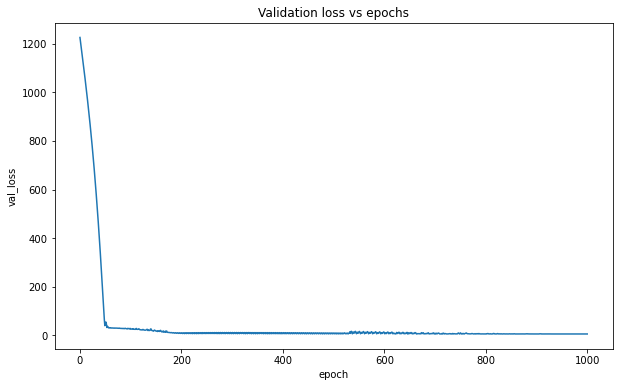

In [91]:
losses = [r['val_loss'] for r in [result] + history]

plt.figure(figsize=(10,6))
plt.plot(losses, '-')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('Validation loss vs epochs')

Text(0.5, 1.0, 'Learning Rate vs. Batch number')

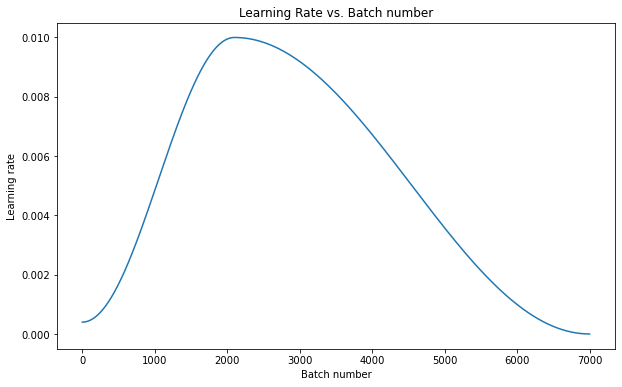

In [94]:
learning_rate = np.concatenate([x.get('lrs', []) for x in history])

plt.figure(figsize=(10,6))
plt.plot(learning_rate)
plt.xlabel('Batch number')
plt.ylabel('Learning rate')
plt.title('Learning Rate vs. Batch number')

In [97]:
result = evaluate(model, val_loader)
final_loss = round(result['val_loss'], 3)

In [99]:
average_life = df['life_expectancy'].mean()
accuracy = round((average_life - final_loss - 0.5) * 100 / average_life, 2)
print('Final loss value: {} - Accuracy: {}%'.format(final_loss, accuracy))

Final loss value: 5.984 - Accuracy: 90.46%


## 8. Predictions

In [100]:
def predict_single(x, model):
    xb = x.unsqueeze(0)
    return model(x).item()

In [101]:
x, target = val_ds[100]
pred = predict_single(x, model)
print("Target: ", target.item())
print("Prediction: ", pred)

Target:  45.5
Prediction:  50.16633605957031


In [103]:
x, target = val_ds[150]
pred = predict_single(x, model)
print("Target: ", target.item())
print("Prediction: ", pred)

Target:  76.5999984741211
Prediction:  74.02863311767578


In [106]:
x, target = val_ds[250]
pred = predict_single(x, model)
print("Target: ", target.item())
print("Prediction: ", pred)

Target:  56.5
Prediction:  61.5206298828125


In [107]:
# final parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 1.2325e+01,  5.8189e-05, -6.3188e-01,  5.2409e-03,  3.8411e+00,
           4.3894e+00]], requires_grad=True),
 Parameter containing:
 tensor([8.7723], requires_grad=True)]